<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


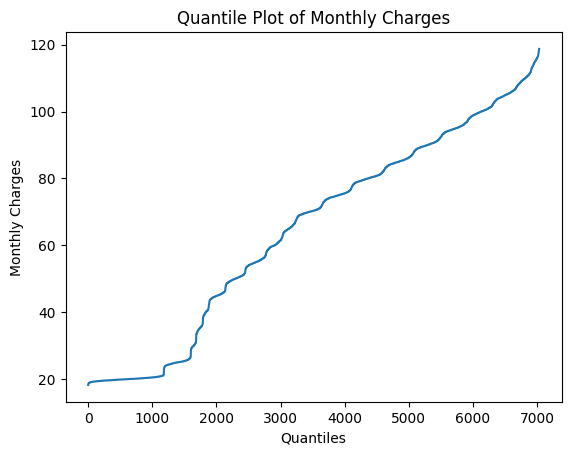

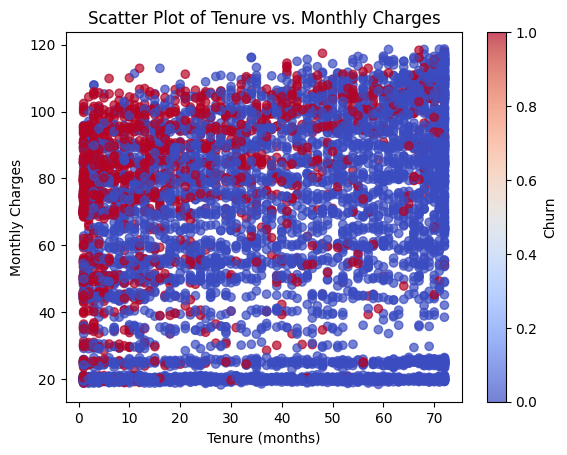

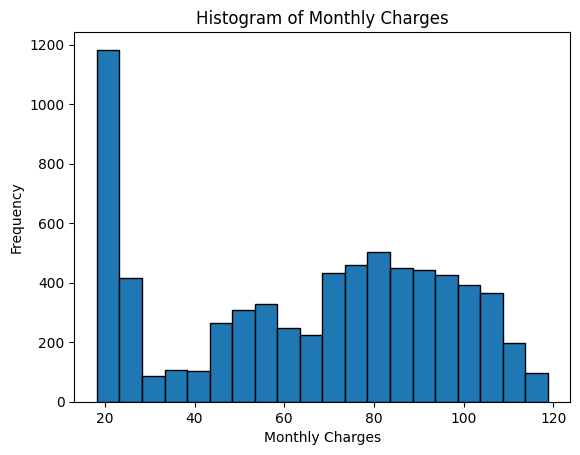

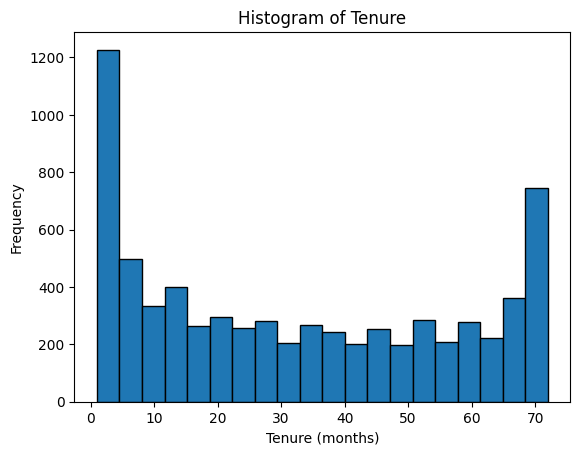

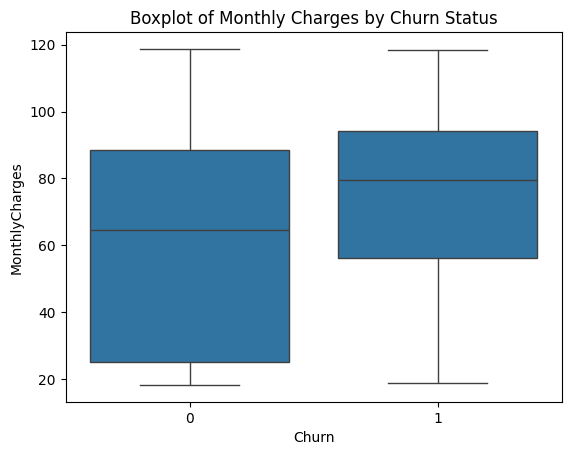

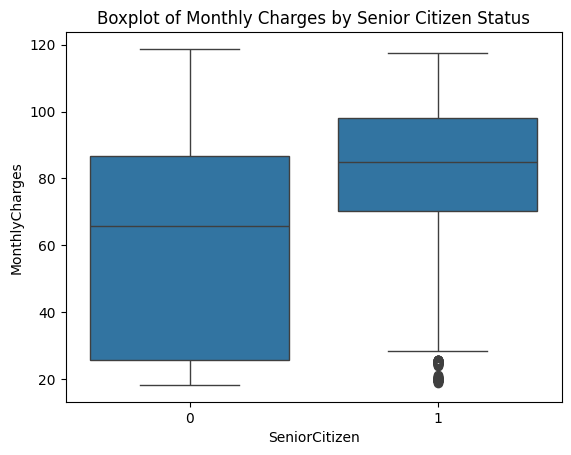

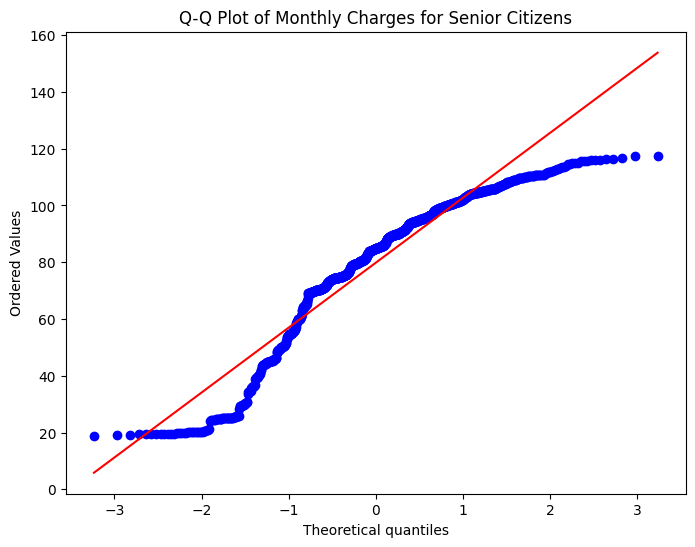

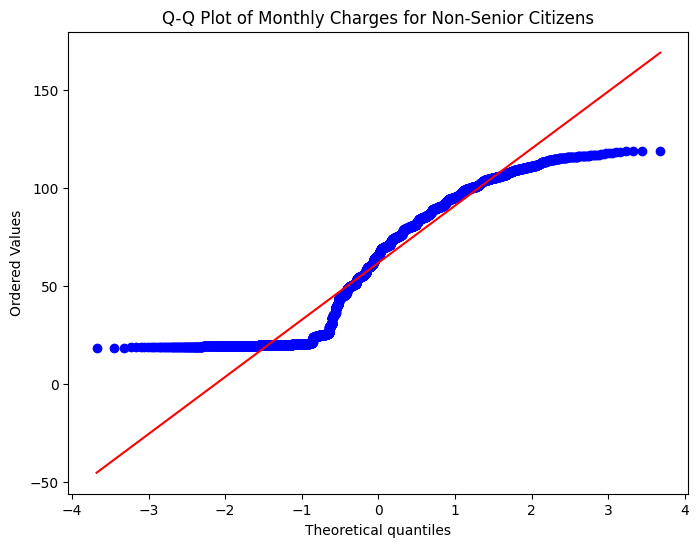

In [2]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
import seaborn as sns

# Load the dataset
df = pd.read_csv(r'C:\Users\Keerthi\Downloads\Telco-Customer-Churn_366077da-780d-4181-a8f5-4fc8ef8294f7.csv')

# Display the first few rows of the dataset
df.head()

# Check the structure of the dataset
df.info()

# Check for missing values
df.isnull().sum()

# Get summary statistics for numerical columns
df.describe()

# Check the distribution of categorical variables
df['Churn'].value_counts()
df['SeniorCitizen'].value_counts()

# Convert the 'Churn' column to numeric values: 1 for 'Yes' and 0 for 'No'
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Now calculate the churn rate for Senior Citizens and Non-Senior Citizens
churn_rate_sc = df[df['SeniorCitizen'] == 1]['Churn'].mean()
churn_rate_nsc = df[df['SeniorCitizen'] == 0]['Churn'].mean()

print(f"Churn Rate for Senior Citizens: {churn_rate_sc:.2f}")
print(f"Churn Rate for Non-Senior Citizens: {churn_rate_nsc:.2f}")

# Extract MonthlyCharges for both groups
monthly_charges_sc = df[df['SeniorCitizen'] == 1]['MonthlyCharges']
monthly_charges_nsc = df[df['SeniorCitizen'] == 0]['MonthlyCharges']


# Check for non-numeric values in the dataset
print(df[['tenure', 'MonthlyCharges', 'TotalCharges']].dtypes)

# Convert 'TotalCharges' to numeric, coercing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Identify rows with NaN values
print(df[['tenure', 'MonthlyCharges', 'TotalCharges']].isnull().sum())

# Drop rows with NaN values or handle them as appropriate
df = df.dropna(subset=['tenure', 'MonthlyCharges', 'TotalCharges'])

# Re-check the data types
print(df[['tenure', 'MonthlyCharges', 'TotalCharges']].dtypes)

# Select relevant features
features = df[['tenure', 'MonthlyCharges', 'TotalCharges']].dropna()

# Compute Euclidean distance matrix
distances = euclidean_distances(features)
print(distances)

# Quantile plot for Monthly Charges
df['MonthlyCharges'].sort_values().reset_index(drop=True).plot(kind='line')
plt.title('Quantile Plot of Monthly Charges')
plt.ylabel('Monthly Charges')
plt.xlabel('Quantiles')
plt.show()  # Show the quantile plot

# Scatter plot for Monthly Charges vs. Tenure
plt.scatter(df['tenure'], df['MonthlyCharges'], c=df['Churn'], cmap='coolwarm', alpha=0.7)
plt.title('Scatter Plot of Tenure vs. Monthly Charges')
plt.xlabel('Tenure (months)')
plt.ylabel('Monthly Charges')
plt.colorbar(label='Churn')
plt.show()  # Show the scatter plot

# Histogram for Monthly Charges
plt.hist(df['MonthlyCharges'], bins=20, edgecolor='black')
plt.title('Histogram of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.show()  # Show the histogram for Monthly Charges

# Histogram for Tenure
plt.hist(df['tenure'], bins=20, edgecolor='black')
plt.title('Histogram of Tenure')
plt.xlabel('Tenure (months)')
plt.ylabel('Frequency')
plt.show()  # Show the histogram for Tenure

# Boxplot for MonthlyCharges by Churn
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Boxplot of Monthly Charges by Churn Status')
plt.show()  # Show the boxplot by Churn

# Boxplot for MonthlyCharges by Senior Citizen Status
sns.boxplot(x='SeniorCitizen', y='MonthlyCharges', data=df)
plt.title('Boxplot of Monthly Charges by Senior Citizen Status')
plt.show()  # Show the boxplot by Senior Citizen Status

# Generate Q-Q plot for Senior Citizens
plt.figure(figsize=(8, 6))
stats.probplot(monthly_charges_sc, dist="norm", plot=plt)
plt.title('Q-Q Plot of Monthly Charges for Senior Citizens')
plt.show()  # Show the Q-Q plot for Senior Citizens

# Generate Q-Q plot for Non-Senior Citizens
plt.figure(figsize=(8, 6))
stats.probplot(monthly_charges_nsc, dist="norm", plot=plt)
plt.title('Q-Q Plot of Monthly Charges for Non-Senior Citizens')
plt.show()  # Show the Q-Q plot for Non-Senior Citizens





